In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import datetime
import datetime as dt

In [173]:
df = pd.read_csv(
    '/Users/maria/Documents/spiced/spiced_projects/spiced_repo/week7/data/ECA_blended_custom/TG_STAID002759.txt', 
    skiprows=19, 
    skipinitialspace=True,
)

In [174]:
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53352,111448,20220127,44,0
53353,111448,20220128,49,0
53354,111448,20220129,58,0
53355,111448,20220130,58,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53357 entries, 0 to 53356
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   53357 non-null  int64
 1   DATE    53357 non-null  int64
 2   TG      53357 non-null  int64
 3   Q_TG    53357 non-null  int64
dtypes: int64(4)
memory usage: 1.6 MB


In [176]:
df.describe()

,SOUID,DATE,TG,Q_TG
count,53357.000000,5.335700e+04,53357.000000,53357.000000
mean,119357.653541,1.948610e+07,57.050415,0.032910
std,8023.826001,4.217116e+05,614.099351,0.543108
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,111448.000000,1.912071e+07,33.000000,0.000000
50%,111448.000000,1.949012e+07,94.000000,0.000000
75%,127488.000000,1.985072e+07,157.000000,0.000000
max,128124.000000,2.022013e+07,305.000000,9.000000


In [177]:
df.drop(['SOUID'], axis=1, inplace=True)

In [178]:
df['DATE'] = df['DATE'].astype(str)
df.set_index(pd.to_datetime(df['DATE']), inplace= True)
df.drop(['DATE'], axis=1, inplace=True)

In [179]:
df['T'] = df['TG']*0.1
df.drop(['TG'], axis=1, inplace=True)

In [180]:
df

,Q_TG,T
DATE,,
1876-01-01,0,2.2
1876-01-02,0,2.5
1876-01-03,0,0.3
1876-01-04,0,-5.8
1876-01-05,0,-9.8
...,...,...
2022-01-27,0,4.4
2022-01-28,0,4.9
2022-01-29,0,5.8


# Imputation

In [181]:
# Quality coloumn contains info for missing values
df['Q_TG'].value_counts()

0    53161
9      195
1        1
Name: Q_TG, dtype: int64

In [182]:
missing_values = df[df['Q_TG']==9]
missing_values.index 

DatetimeIndex(['1945-04-25', '1945-04-26', '1945-04-27', '1945-04-28',
               '1945-04-29', '1945-04-30', '1945-05-01', '1945-05-02',
               '1945-05-03', '1945-05-04',
               ...
               '1945-10-27', '1945-10-28', '1945-10-29', '1945-10-30',
               '1945-10-31', '1945-11-01', '1945-11-02', '1945-11-03',
               '1945-11-04', '1945-11-05'],
              dtype='datetime64[ns]', name='DATE', length=195, freq=None)

The 195 missing values are the days between 25.04.1945 and 05.11.1945. 

To impute them, I take the mean temperatures from 2 years before and two years after:

In [183]:
before = df.loc['1943-04-25':'1945-04-24']
after = df.loc['1945-11-06':'1947-11-05']
before = before.groupby([before.index.month, before.index.day]).mean()
after = after.groupby([after.index.month, after.index.day]).mean()

In [184]:
for date in missing_values.index:
    df.loc[date,'T'] = round((before.loc[(date.month,date.day),'T']+ 
                              after.loc[(date.month,date.day),'T'])/2,1)

In [185]:
# Quality coloumn is not needed any more
df.drop(['Q_TG'], axis=1, inplace=True)

# Train - Test Split

In [186]:
df_train = pd.DataFrame.copy(df.loc[:'2016-01-01'])
df_test = pd.DataFrame.copy(df.loc['2016-01-01':])

# Visualization

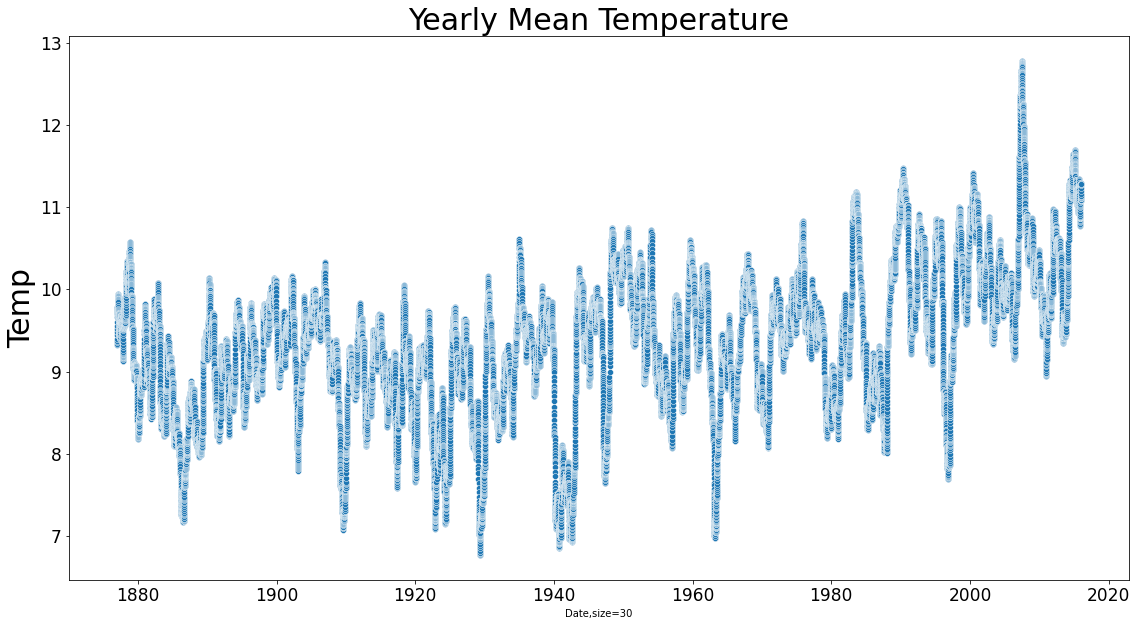

In [187]:
plt.figure(figsize=(19,10))
sns.scatterplot(data =df_train.loc[:'2020-12-31'].rolling(365).mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=30)
plt.xlabel('Date,size=30')
plt.title('Yearly Mean Temperature',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

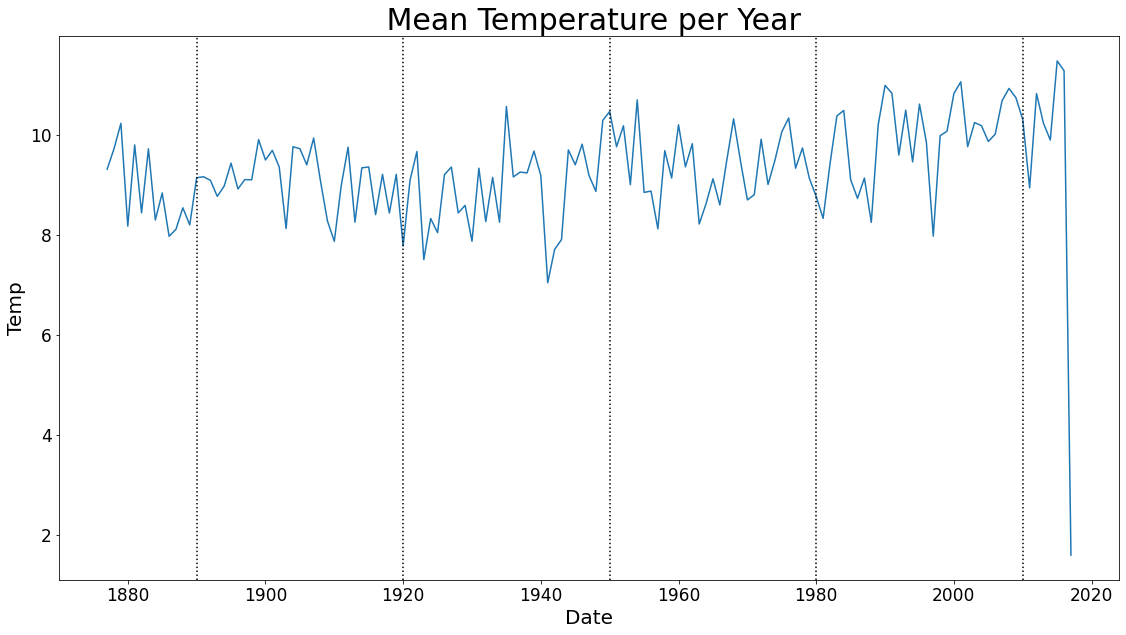

In [188]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df_train.loc[:'2020-12-31'].resample('Y').mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=20)
plt.xlabel('Date',size=20)
mod = [y for y in df_train.index.year if not y%30]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.title(' Mean Temperature per Year',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

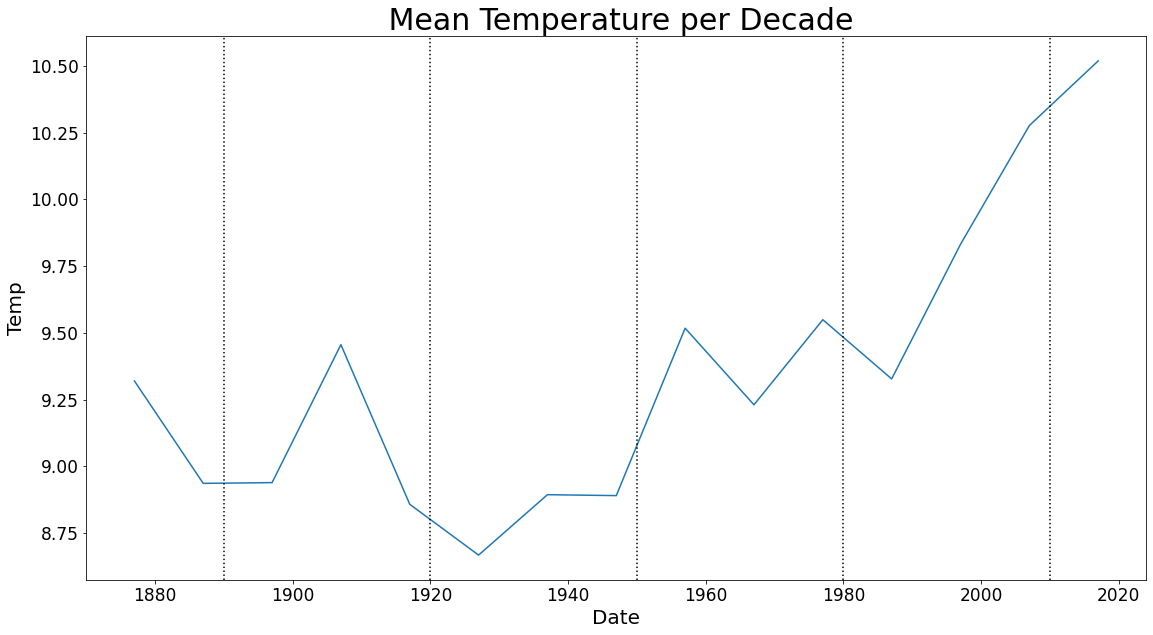

In [189]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df_train.loc[:'2020-12-31'].resample('10Y').mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=20)
plt.xlabel('Date',size=20)
mod = [y for y in df_train.index.year if not y%30]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.title(' Mean Temperature per Decade',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

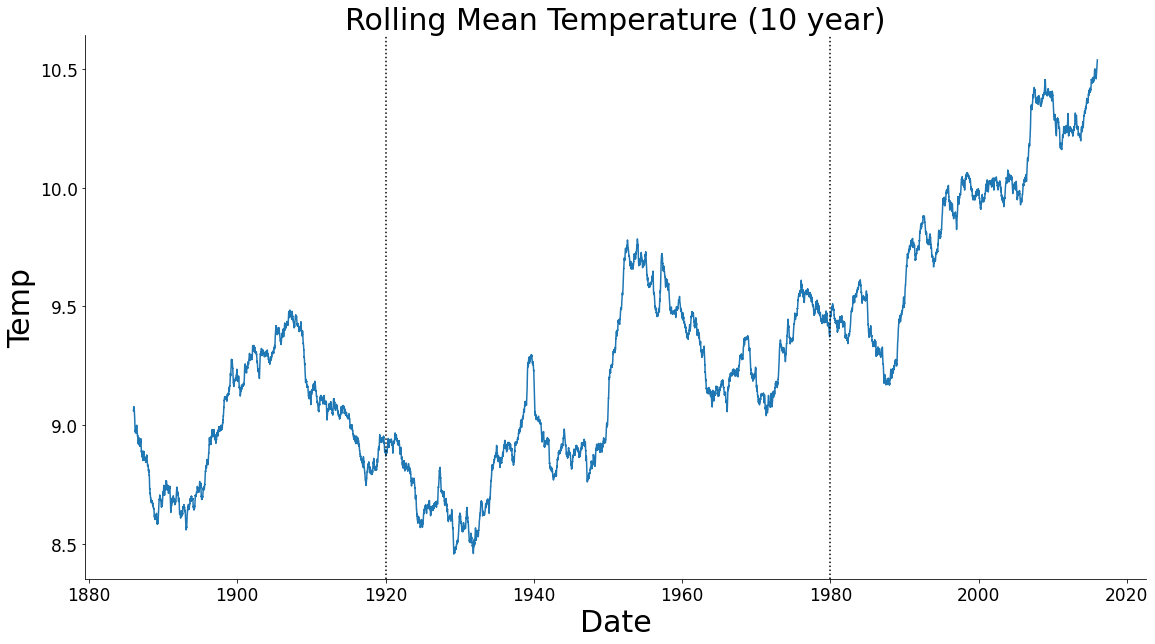

In [190]:
plt.figure(figsize=(19,10))
sns.lineplot(data = df_train.rolling(3652).mean(), y ='T', x ='DATE', markersize=12)
mod = [y for y in df_train.index.year if not y%60]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.ylabel('Temp',size=30)
plt.xlabel('Date',size=30)
plt.title('Rolling Mean Temperature (10 year)',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
sns.despine()

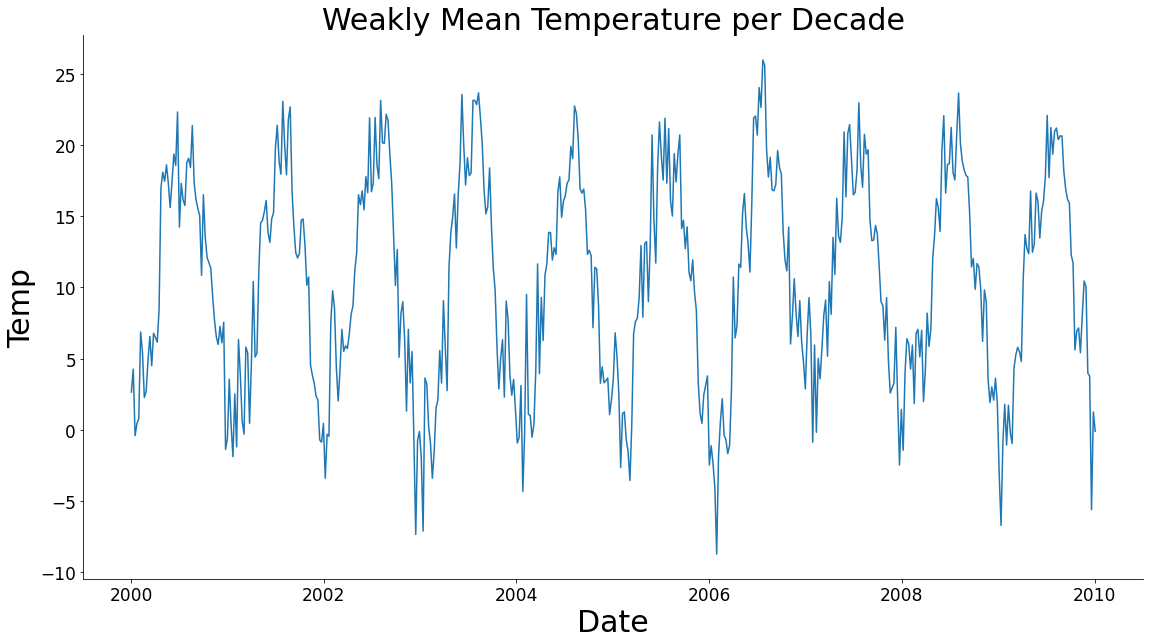

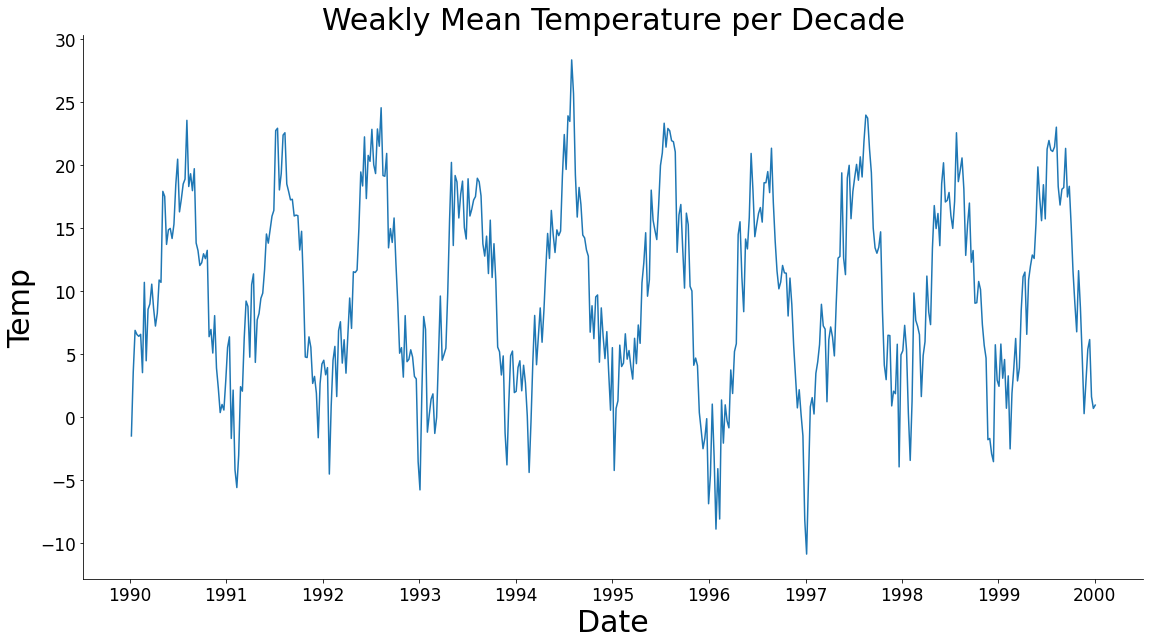

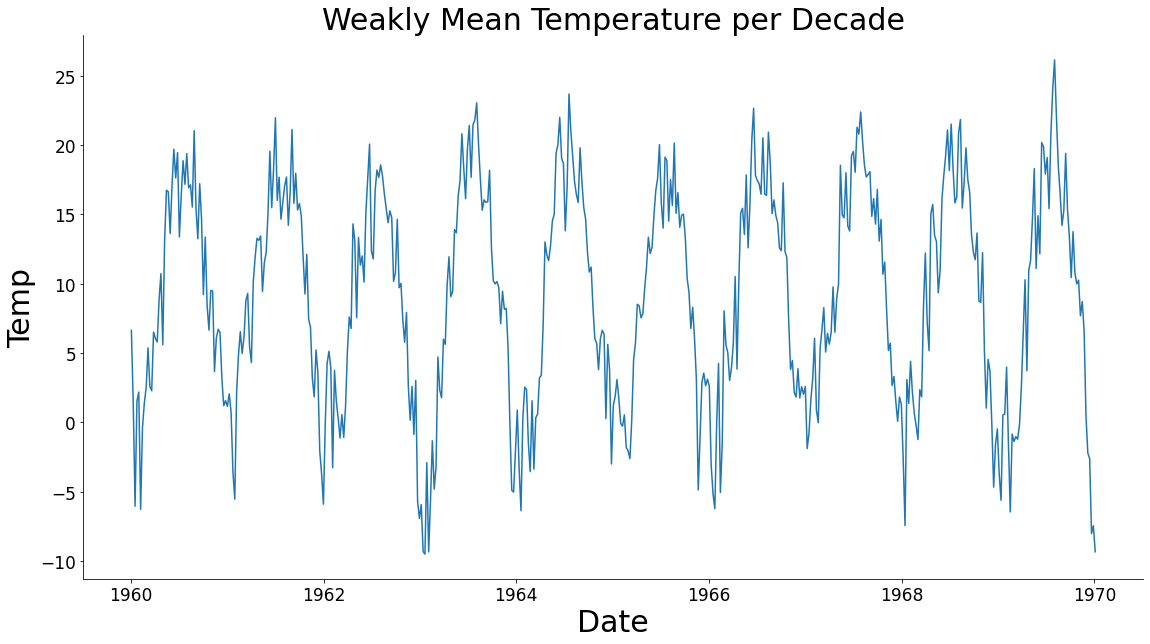

In [191]:
mod = list(set([y for y in df_train.index.year if not y%10]))
for decade in random.sample(mod[:-2],3):
    plt.figure(figsize=(19,10))
    start = f'{decade}-01-01'
    end = f'{decade+9}-12-31'
    sns.lineplot(data = df_train['T'].loc[start:end].resample('W').mean())
    plt.title('Weakly Mean Temperature per Decade',size=30)
    plt.ylabel('Temp',size=30)
    plt.xlabel('Date',size=30)  
    plt.xticks(size=17)
    plt.yticks(size=17)
    sns.despine()

# Cycles of climate? 

### Most important: Yearly Orbit around the Sun

Solar activity: 
  * multiples of 22.75 years
  * intensity increase slowly and then decrease sharply, with a period of about 80-100 years

Ocean-atmosphere interactions: 
 1. El Niño-Southern Oscillation (ENSO): 
  * an interaction between ocean temperatures and atmospheric patterns 
  * 3 to 7 
  * years different weather conditions to different parts of the world (NASA 2009)

2. Pacific Decadal Oscillation (PDO): 
  * occurs in cycles of 25-45 years (Mantua et al. 1997), 

3. Atlantic Multi-decadal Oscillation (AMO):
  * occurring on approximately 65-85 year cycles (Deser et al. 2010). 
  * interaction with the enhanced greenhouse effect (Li et al. 2013).

### Non periodic effects

Orbit around the Sun:
  * changes in eccentricity
  * changes in the tilt of the earth's axis

Random events:
  * Volcanos
  * meteorites
  * comets

Human:
  * Greenhouse gases
  * industrial pollution particles
  * ozone depletion


source:  
 * https://www.fs.usda.gov/ccrc/education/climate-primer/natural-climate-cycles
 * http://dmod.physics.auth.gr/klima_02.htm
 

## Search for higher periodicity than the yearly 

In [192]:
df_train

,T
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2015-12-28,7.2
2015-12-29,4.5
2015-12-30,0.7


In [193]:
from scipy.interpolate import interp1d

In [194]:
df_train['timestep'] = list(range(len(df_train)))

In [195]:
f = df_train.resample('Y').mean()
f

,T,timestep
DATE,,
1876-12-31,9.320219,182.5
1877-12-31,9.727945,548.0
1878-12-31,10.236712,913.0
1879-12-31,8.180548,1278.0
1880-12-31,9.805191,1643.5
...,...,...
2012-12-31,10.240437,49855.5
2013-12-31,9.902740,50221.0
2014-12-31,11.485205,50586.0


In [196]:
f1 = interp1d(f['timestep'], f['T'], kind='cubic',fill_value="extrapolate")


In [197]:
f1(df_train['timestep'])

array([11.1217942 , 11.10614477, 11.09056679, ...,  1.76521357,
        1.68279337,  1.6       ])

<AxesSubplot:xlabel='timestep', ylabel='T'>

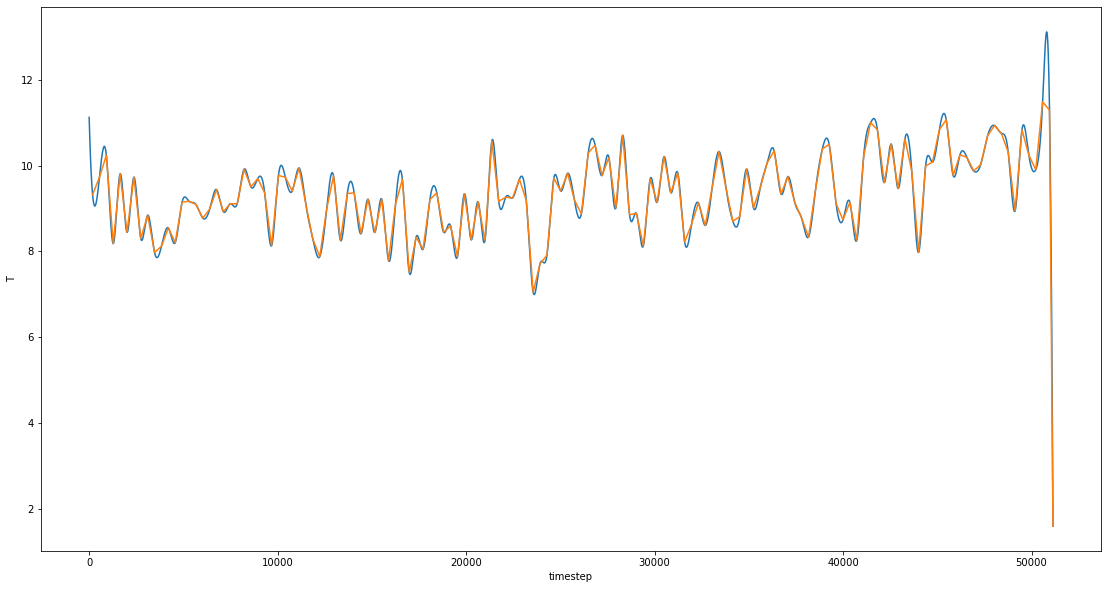

In [198]:
plt.figure(figsize=(19,10))
sns.lineplot(y=f1(df_train['timestep']),x=df_train['timestep'])
sns.lineplot( y =f['T'], x =f['timestep'])


In [199]:
df_train['interpolated'] = f1(df_train['timestep'])

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
m_trend = LinearRegression()
m_trend.fit(df_train[['timestep']], df_train['interpolated'])

LinearRegression()

In [202]:
df_train['trend'] = m_trend.predict(df_train[['timestep']])

In [203]:
df_train

,T,timestep,interpolated,trend
DATE,,,,
1876-01-01,2.2,0,11.121794,8.654662
1876-01-02,2.5,1,11.106145,8.654689
1876-01-03,0.3,2,11.090567,8.654716
1876-01-04,-5.8,3,11.075060,8.654742
1876-01-05,-9.8,4,11.059625,8.654769
...,...,...,...,...
2015-12-28,7.2,51130,1.928937,10.014089
2015-12-29,4.5,51131,1.847261,10.014116
2015-12-30,0.7,51132,1.765214,10.014143


<AxesSubplot:xlabel='DATE', ylabel='interpolated'>

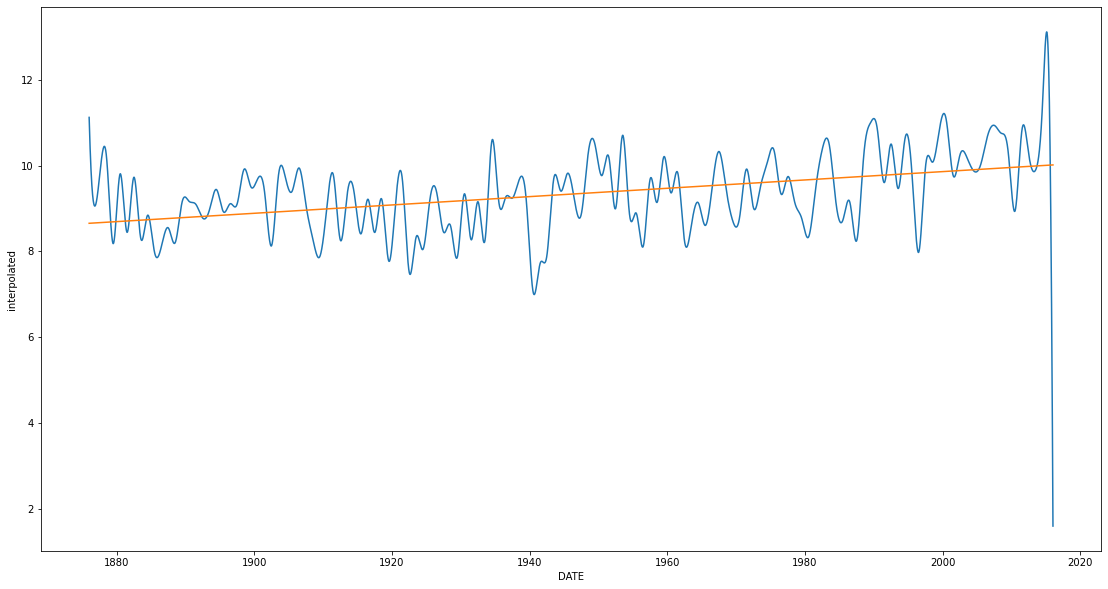

In [204]:
plt.figure(figsize=(19,10))
sns.lineplot(data=df_train, y ='interpolated', x ='DATE')
sns.lineplot(data=df_train, y ='trend', x ='DATE')

In [205]:
signal = df_train['interpolated'] - df_train['trend']
signal

DATE
1876-01-01    2.467132
1876-01-02    2.451456
1876-01-03    2.435851
1876-01-04    2.420318
1876-01-05    2.404856
                ...   
2015-12-28   -8.085152
2015-12-29   -8.166855
2015-12-30   -8.248929
2015-12-31   -8.331376
2016-01-01   -8.414196
Length: 51135, dtype: float64

In [206]:
# Number of sampling points
n = len(signal)
n

51135

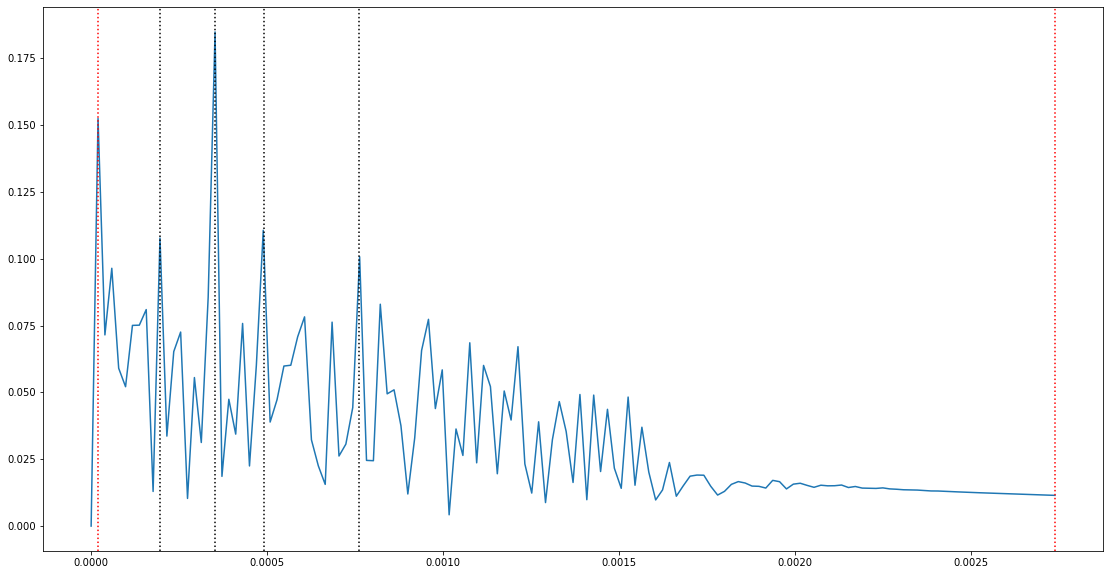

In [271]:

# Sampling space
T = 1.0/365.25 

# fast fourier transform
fourier_signal = np.fft.fft(signal,n)/n
fourier_signal = fourier_signal[range(int(n/2))]

freq = np.arange(int(n/2))/n
plt.figure(figsize=(19,10))

sns.lineplot(x=freq[:141], y=np.abs(fourier_signal)[:141])
plt.axvline(1.955607705094358e-05, color='red', ls=':') # f = 1/1year
plt.axvline(0.0027378507871321013, color='red', ls=':') # f = 1/140year
plt.axvline(0.000197, color='black', ls=':') # peak 0
plt.axvline(0.000351, color='black', ls=':') # peak 1
plt.axvline(0.000762, color='black', ls=':') # peak 3
plt.axvline(0.000491, color='black', ls=':') # peak 4
plt.show
None

In [225]:
# for a period of 1 year the frequency is 1/(365.25)
# We have taken the yearly mean so we can only consider 
# smaller than this frequencies
1.0/365.25

0.0027378507871321013

In [270]:
# for a period of 140 year the frequency is 1/(140*365.25)
# We cannot consider larger than this frequencies
1.0/(140.0*365.25)
# for this reason we cannot consider the first peak

1.955607705094358e-05

In [258]:
T0 = 1.0/0.000197
T0/365.25

13.897719731635032

In [259]:
T1 = 1.0/0.00035
T1/365.25

7.822430820377432

In [260]:
T2 = 1.0/0.000491
T2/365.25

5.576070849556214

In [261]:
T3 = 1.0/0.000762
T3/365.25

3.592980035606432